<a href="https://colab.research.google.com/github/RohitPrasad99/Loan-Default-Prediction/blob/main/Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing necessary libraries
#pandas- Data(rows and columns) manipulation library
#numpy- Variable manippulation library
#seaborn- Data visualization library
#matplotlib- Graph plotting and visualization library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
#inline gives us inline view charts and plots 
%matplotlib inline

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/Final_project/application_train.csv"

'/content/gdrive/My Drive/Final_project/application_train.csv'


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
#importing the training dataset into the 'train' variable using the read_csv function of pandas(imported as pd)

In [ ]:
import io
train = pd.read_csv("/content/gdrive/My Drive/Final_project/application_train.csv")

In [ ]:
print(train.shape)


(307511, 122)


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [ ]:
#From the above output, we come to know that there are 65 float(most probably continuos variables) and 16 string variables which can be considered as categorical

In [ ]:
# Now we will encode categorical string variables with integer numbers.

In [ ]:
# Create a label encoder object
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [ ]:
train = pd.get_dummies(train)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 243 entries, SK_ID_CURR to EMERGENCYSTATE_MODE_Yes
dtypes: float64(65), int64(44), uint8(134)
memory usage: 295.0 MB


In [ ]:
(train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
#As we can see that in 'DAYS_EMPLOYED' column the maximum value is 1000 years which is highly unlikely!!(duhhh.....)
#This appears to be a typo and we need to rectify it

In [ ]:
(train['DAYS_EMPLOYED']).describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
anomaly_in_days=train[train['DAYS_EMPLOYED']==365243]

In [ ]:
n=len(anomaly_in_days.index)

In [ ]:
m=len(anomaly_in_days[anomaly_in_days['TARGET']==1].index)

In [ ]:
(m/n)*100

5.399646043269405

In [ ]:
no_anomaly=train[train['DAYS_EMPLOYED']!=365243]

In [ ]:
n=len(no_anomaly.index)
m=len(no_anomaly[no_anomaly['TARGET']==1])
(m/n)*100

8.65997453765215

In [ ]:
#This implies that anomalous days have lower precentage of default than non anomalous.
#We need to replace these values with NaN values

In [ ]:
train['DAYS_EMPLOYED'].replace(365243, value=np.nan, inplace=True)

In [ ]:
train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
#Now we handled the categorical variables and anomalies.
#Let's look at correlation between variables and also with respect to the target

In [ ]:
correlations=train.corr()

In [ ]:
print('\nPositive correlation\n')
print(correlations['TARGET'].sort_values(ascending=False).head(15))
print('\nNegative correlation\n')
print(correlations['TARGET'].sort_values(ascending=False).tail(15))


Positive correlation

TARGET                                               1.000000
DAYS_BIRTH                                           0.078239
DAYS_EMPLOYED                                        0.074958
REGION_RATING_CLIENT_W_CITY                          0.060893
REGION_RATING_CLIENT                                 0.058899
NAME_INCOME_TYPE_Working                             0.057481
DAYS_LAST_PHONE_CHANGE                               0.055218
CODE_GENDER_M                                        0.054713
DAYS_ID_PUBLISH                                      0.051457
REG_CITY_NOT_WORK_CITY                               0.050994
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
FLAG_EMP_PHONE                                       0.045982
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_DOCUMENT_3                                      0.044346
OCCUPATION_TYPE_Laborers                             0.043019
Name: TARGET, dtype: float64

Negative correlat

In [ ]:
'''
correlation visualization
fig, axes=plt.subplots(figsize=(50,50))
sns.heatmap(train.corr(), annot=True,ax=axes)
'''

'\ncorrelation visualization\nfig, axes=plt.subplots(figsize=(50,50))\nsns.heatmap(train.corr(), annot=True,ax=axes)\n'

In [ ]:
def get_hi_corr(df,target):
    y=0.7
    lst=[]
    for i in range(2,121):
        for j in range (1,i):
            x=df.iloc[i][j]
            if(x>=y or x<=(-y)):
                m=np.abs(target[df.index[i]])
                n=np.abs(target[df.index[j]])
                print(m,n)
                if(m<=n):
                    if df.index[i] not in lst and df.index[j] not in lst:
                        lst.append(df.index[i])
                else:
                    if df.index[j] not in lst and df.index[i] not in lst:
                        lst.append(df.index[j])
                print(df.index[i],df.index[j],df.iloc[i][j])
    print(lst)
    return lst

In [ ]:
#Now we have the column-pairs that are highly correlated.
#It would be better for the model if we drop one of the two.
#From above we also have correlation of each column with respect to the target.
#Correlation is not the best approach but it gives us an idea about the importance of that feature/ variable in the model
#This will help us in choosing which column to drop finally.

In [ ]:
#The 3 variables with the strongest negative correlations with the target are EXT_SOURCE_1, EXT_SOURCE_2, 
#and EXT_SOURCE_3. According to the documentation, these features represent a "normalized score from external 
#data source". I'm not sure what this exactly means, but it may be a cumulative sort of credit rating made 
#using numerous sources of data.

In [ ]:
#Dropping one of the variables with high correlation 
label_to_drop=get_hi_corr(correlations,correlations['TARGET'])

0.012816561515431712 0.03036928646150375
AMT_ANNUITY AMT_CREDIT 0.7701380033120081
0.039645281169414404 0.03036928646150375
AMT_GOODS_PRICE AMT_CREDIT 0.9869683054228436
0.039645281169414404 0.012816561515431712
AMT_GOODS_PRICE AMT_ANNUITY 0.775109273311908
0.009307784396530822 0.019187133596327993
CNT_FAM_MEMBERS CNT_CHILDREN 0.8791606404404514
0.060892667564898695 0.058899014945840766
REGION_RATING_CLIENT_W_CITY REGION_RATING_CLIENT 0.9508422141600533
0.00281947918418061 0.006941907545423441
LIVE_REGION_NOT_WORK_REGION REG_REGION_NOT_WORK_REGION 0.8606267802758127
0.03251834110161418 0.050994464367959576
LIVE_CITY_NOT_WORK_CITY REG_CITY_NOT_WORK_CITY 0.8255747229651973
0.034198793675268006 0.02949756463337797
ELEVATORS_AVG APARTMENTS_AVG 0.8369580414057575
0.03361350325191881 0.044003370532464434
FLOORSMIN_AVG FLOORSMAX_AVG 0.7424367124617699
0.02503053329108065 0.02949756463337797
LIVINGAPARTMENTS_AVG APARTMENTS_AVG 0.9439521423345436
0.02503053329108065 0.034198793675268006
LIVINGA

In [ ]:
train.drop(labels=label_to_drop[:len(label_to_drop)-2],axis=1,inplace=True)

In [ ]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BASEMENTAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,LANDAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Ki

In [ ]:
train.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 202 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   SK_ID_CURR                                         307511 non-null  int64  
 1   TARGET                                             307511 non-null  int64  
 2   NAME_CONTRACT_TYPE                                 307511 non-null  int64  
 3   FLAG_OWN_CAR                                       307511 non-null  int64  
 4   FLAG_OWN_REALTY                                    307511 non-null  int64  
 5   CNT_CHILDREN                                       307511 non-null  int64  
 6   AMT_INCOME_TOTAL                                   307511 non-null  float64
 7   AMT_GOODS_PRICE                                    307233 non-null  float64
 8   REGION_POPULATION_RELATIVE                         307511 non-null  float

In [ ]:
#Missing value treatment begins!!!!

In [ ]:
train.count()[train.count()<307511]

AMT_GOODS_PRICE                 307233
DAYS_EMPLOYED                   252137
OWN_CAR_AGE                     104582
EXT_SOURCE_1                    134133
EXT_SOURCE_2                    306851
EXT_SOURCE_3                    246546
BASEMENTAREA_AVG                127568
ELEVATORS_AVG                   143620
ENTRANCES_AVG                   152683
FLOORSMAX_AVG                   154491
NONLIVINGAPARTMENTS_AVG          93997
NONLIVINGAREA_AVG               137829
YEARS_BEGINEXPLUATATION_MEDI    157504
YEARS_BUILD_MEDI                103023
COMMONAREA_MEDI                  92646
LANDAREA_MEDI                   124921
OBS_30_CNT_SOCIAL_CIRCLE        306490
DEF_30_CNT_SOCIAL_CIRCLE        306490
DAYS_LAST_PHONE_CHANGE          307510
AMT_REQ_CREDIT_BUREAU_HOUR      265992
AMT_REQ_CREDIT_BUREAU_DAY       265992
AMT_REQ_CREDIT_BUREAU_WEEK      265992
AMT_REQ_CREDIT_BUREAU_MON       265992
AMT_REQ_CREDIT_BUREAU_QRT       265992
AMT_REQ_CREDIT_BUREAU_YEAR      265992
dtype: int64

In [ ]:
#These are the features/variables that have missing values

In [ ]:
train.count()[train.count()<307511]

AMT_GOODS_PRICE                 307233
DAYS_EMPLOYED                   252137
OWN_CAR_AGE                     104582
EXT_SOURCE_1                    134133
EXT_SOURCE_2                    306851
EXT_SOURCE_3                    246546
BASEMENTAREA_AVG                127568
ELEVATORS_AVG                   143620
ENTRANCES_AVG                   152683
FLOORSMAX_AVG                   154491
NONLIVINGAPARTMENTS_AVG          93997
NONLIVINGAREA_AVG               137829
YEARS_BEGINEXPLUATATION_MEDI    157504
YEARS_BUILD_MEDI                103023
COMMONAREA_MEDI                  92646
LANDAREA_MEDI                   124921
OBS_30_CNT_SOCIAL_CIRCLE        306490
DEF_30_CNT_SOCIAL_CIRCLE        306490
DAYS_LAST_PHONE_CHANGE          307510
AMT_REQ_CREDIT_BUREAU_HOUR      265992
AMT_REQ_CREDIT_BUREAU_DAY       265992
AMT_REQ_CREDIT_BUREAU_WEEK      265992
AMT_REQ_CREDIT_BUREAU_MON       265992
AMT_REQ_CREDIT_BUREAU_QRT       265992
AMT_REQ_CREDIT_BUREAU_YEAR      265992
dtype: int64

In [ ]:
train.drop(labels=['COMMONAREA_MEDI','NONLIVINGAPARTMENTS_AVG'],axis=1,inplace=True)

In [ ]:
train.count()[train.count()<307511]

AMT_GOODS_PRICE                 307233
DAYS_EMPLOYED                   252137
OWN_CAR_AGE                     104582
EXT_SOURCE_1                    134133
EXT_SOURCE_2                    306851
EXT_SOURCE_3                    246546
BASEMENTAREA_AVG                127568
ELEVATORS_AVG                   143620
ENTRANCES_AVG                   152683
FLOORSMAX_AVG                   154491
NONLIVINGAREA_AVG               137829
YEARS_BEGINEXPLUATATION_MEDI    157504
YEARS_BUILD_MEDI                103023
LANDAREA_MEDI                   124921
OBS_30_CNT_SOCIAL_CIRCLE        306490
DEF_30_CNT_SOCIAL_CIRCLE        306490
DAYS_LAST_PHONE_CHANGE          307510
AMT_REQ_CREDIT_BUREAU_HOUR      265992
AMT_REQ_CREDIT_BUREAU_DAY       265992
AMT_REQ_CREDIT_BUREAU_WEEK      265992
AMT_REQ_CREDIT_BUREAU_MON       265992
AMT_REQ_CREDIT_BUREAU_QRT       265992
AMT_REQ_CREDIT_BUREAU_YEAR      265992
dtype: int64

In [ ]:
#Performing imputation
#Importing the Imputer class and Min Max Scaler for imputation and scaling of features respectively.

from sklearn.impute import SimpleImputer

#Stroring target in 'y'
Y=train['TARGET']

#Dropping target from train.
train.drop(labels='TARGET',axis=1,inplace=True)

#dropping variables haveing dtype=uint8 because we dont want to impute with the same strategy i.e. median
temp_train=pd.DataFrame()
temp_features=[]
for cols in train:
    if train[cols].dtype=='uint8':
        temp_train[cols]=train[cols]
        train.drop(labels=cols,axis=1,inplace=True)
        temp_features.append(cols)

# Feature names
features = list(train.columns)

In [ ]:
# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Fit on the training data
imputer.fit(train)

# Transform  training  data
train = imputer.transform(train)

#imputing the caegorical variables

imputer=SimpleImputer(strategy = 'most_frequent')
imputer.fit(temp_train)
temp_train=imputer.transform(temp_train)


In [ ]:
train=pd.DataFrame(train,columns=features)
for col in train.columns:
    mean = train[col].mean()
    std = train[col].std()
    train[col] = (train[col] - mean) / std
temp_train=pd.DataFrame(temp_train,columns=temp_features)
train=pd.concat([train,temp_train],axis=1)

In [ ]:
train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,BASEMENTAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,NONLIVINGAREA_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,LANDAREA_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORG

In [ ]:
train_scaler=train

In [ ]:
train_scaler.drop(labels='SK_ID_CURR',axis=1,inplace=True)

In [ ]:
X=train_scaler

In [ ]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 198 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   NAME_CONTRACT_TYPE                                 float64
 1   FLAG_OWN_CAR                                       float64
 2   FLAG_OWN_REALTY                                    float64
 3   CNT_CHILDREN                                       float64
 4   AMT_INCOME_TOTAL                                   float64
 5   AMT_GOODS_PRICE                                    float64
 6   REGION_POPULATION_RELATIVE                         float64
 7   DAYS_BIRTH                                         float64
 8   DAYS_EMPLOYED                                      float64
 9   DAYS_REGISTRATION                                  float64
 10  DAYS_ID_PUBLISH                                    float64
 11  OWN_CAR_AGE                                        

In [ ]:
lst=[]
for i in range(0,198):
    lst.append(X.columns[i].replace(' ','_'))
lst2=[]
for i in range(0,198):
    lst2.append(lst[i].replace(':',''))
lst3=[]
for i in range(0,198):
    lst3.append(lst2[i].replace('/',''))
lst4=[]
for i in range(0,198):
    lst4.append(lst3[i].replace(',',''))

In [ ]:
d={}
j=0
for i in X.columns:
    d[lst4[j]]=X[i]
    j=j+1
x=pd.DataFrame(d)

In [ ]:
print(x.shape)

(307511, 198)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=101)

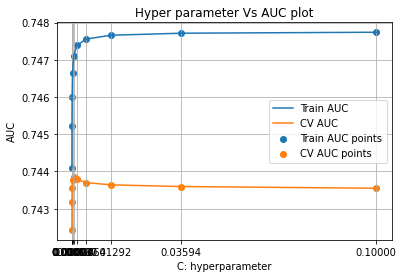

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2.502959,0.201480,0.086188,0.001526,1e-05,{'C': 1e-05},0.746835,0.738018,0.742437,0.742430,0.003600,10,0.742013,0.746050,0.744217,0.744093,0.001650
1,3.295876,0.048947,0.088463,0.006321,2.78256e-05,{'C': 2.782559402207126e-05},0.747705,0.739032,0.742807,0.743181,0.003550,9,0.743102,0.747136,0.745411,0.745216,0.001653
2,4.846313,0.072042,0.085354,0.000843,7.74264e-05,{'C': 7.742636826811278e-05},0.748146,0.739604,0.742908,0.743552,0.003517,7,0.743873,0.747935,0.746185,0.745998,0.001663
3,7.327790,0.256766,0.086188,0.001509,0.000215443,{'C': 0.00021544346900318823},0.748393,0.739921,0.743035,0.743783,0.003499,3,0.744524,0.748623,0.746793,0.746646,0.001677
4,10.816951,0.301148,0.085058,0.001520,0.000599484,{'C': 0.0005994842503189409},0.748456,0.739989,0.743098,0.743848,0.003497,1,0.744974,0.749107,0.747239,0.747107,0.001690


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=10000,class_weight={0:11,1:120})

params = dict(C = list(np.logspace(-5,-1,10)))

clf = GridSearchCV(logreg,param_grid = params,scoring = 'roc_auc',cv=3,return_train_score=True)
clf.fit(X_train,y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
C =  results['param_C']
# plt.figure(figsize=(6, 6), dpi=200)
plt.plot(C, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039


plt.plot(C, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039

plt.scatter(C, train_auc, label='Train AUC points')
plt.scatter(C, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("C: hyperparameter")
plt.xticks(list(np.logspace(-5,-1,10)))
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()


In [ ]:
clf.best_params_

{'C': 0.0005994842503189409}

In [ ]:
# logreg=LogisticRegression(class_weight={0:11,1:120},max_iter=10000)

In [ ]:
# logreg.fit(X_train,y_train)

In [ ]:
predictions=clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[59618, 25273],
       [ 2544,  4819]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, predictions)

0.6984737789147354

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84891
           1       0.16      0.65      0.26      7363

    accuracy                           0.70     92254
   macro avg       0.56      0.68      0.53     92254
weighted avg       0.90      0.70      0.77     92254



In [ ]:
probability=clf.predict_proba(X_test)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
logit_roc_auc2=roc_auc_score(y_test,predictions)
print(logit_roc_auc2)

0.6783887384692412


Percentage accuracy is  0.6984737789147354


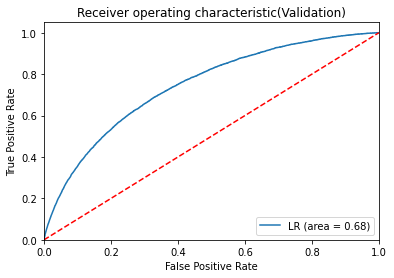

In [ ]:
confusion_matric=confusion_matrix(y_test,clf.predict(X_test))
acc=(confusion_matric[0][0]+confusion_matric[1][1])/(confusion_matric[0][0]+confusion_matric[0][1]+confusion_matric[1][0]+confusion_matric[1][1])
print("Percentage accuracy is ", acc)
fpr, tpr, thresholds = roc_curve(y_test,probability[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LR (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Validation)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC2_LR')

0.6822086227146097


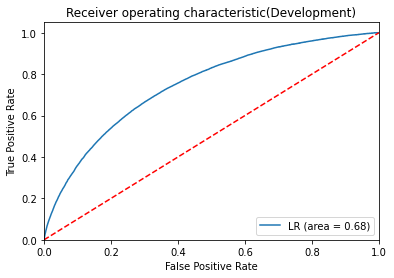

In [ ]:
logit_roc_auc=roc_auc_score(y_train,clf.predict(X_train))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LR (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Development)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC_LR')

# ANN model


In [ ]:
!pip install keras

In [ ]:
from tensorflow.keras.utils import to_categorical
from keras import models
from keras import layers
from keras.metrics import Recall

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(90, activation = "sigmoid", input_shape=(198, )))

In [ ]:
model.add(layers.Dense(45, activation = "sigmoid", input_shape=(90, )))

In [ ]:
model.add(layers.Dense(1, activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                17910     
_________________________________________________________________
dense_1 (Dense)              (None, 45)                4095      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 46        
Total params: 22,051
Trainable params: 22,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
 optimizer = "sgd",
 loss = "mean_squared_error",
 metrics = [Recall()]
)

In [ ]:
weight={0:11,1:120}
results = model.fit(
 X_train, y_train,
 epochs= 30,#30
 batch_size = 32,#1024
 class_weight=weight
)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/30
6727/6727 [==============================] - 26s 2ms/step - loss: 4.3502 - recall: 0.6126
Epoch 2/30
6727/6727 [==============================] - 11s 2ms/step - loss: 4.0796 - recall: 0.6674
Epoch 3/30
6727/6727 [==============================] - 11s 2ms/step - loss: 4.0606 - recall: 0.6754
Epoch 4/30
6727/6727 [==============================] - 10s 2ms/step - loss: 4.0812 - recall: 0.6704
Epoch 5/30
6727/6727 [==============================] - 11s 2ms/step - loss: 4.0747 - recall: 0.6664
Epoch 6/30
6727/6727 [==============================] - 11s 2ms/step - loss: 4.0654 - recall: 0.6699
Epoch 7/30
6727/6727 [==============================] - 10s 2ms/step - loss: 4.0113 - recall: 0.6707
Epoch 8/30
6727/6727 [==============================] - 10s 2ms/step - loss: 4.1024 - recall: 0.6757
Epoch 9/30
6727/6727 [==============================] 

In [ ]:
prediction=model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,prediction))

[[61114 23777]
 [ 2700  4663]]


In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82     84891
           1       0.16      0.63      0.26      7363

    accuracy                           0.71     92254
   macro avg       0.56      0.68      0.54     92254
weighted avg       0.89      0.71      0.78     92254



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc2=roc_auc_score(y_test,prediction)
print(logit_roc_auc2)

0.676606529583735


Percentage accuracy is  0.7129988943568842


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


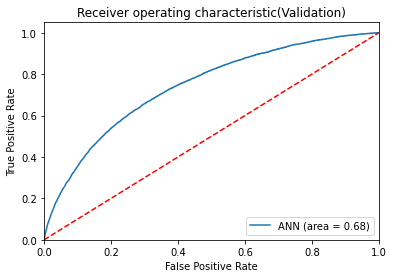

In [ ]:
confusion_matric=confusion_matrix(y_test,prediction)
acc=(confusion_matric[0][0]+confusion_matric[1][1])/(confusion_matric[0][0]+confusion_matric[0][1]+confusion_matric[1][0]+confusion_matric[1][1])
print("Percentage accuracy is ", acc)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test))
plt.figure()
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % logit_roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Validation)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC2')

0.7685922895791407


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


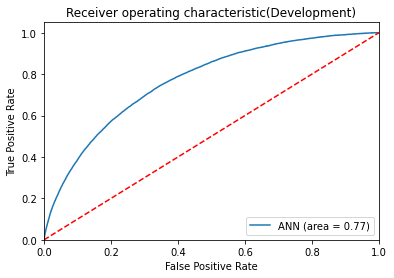

In [ ]:
logit_roc_auc=roc_auc_score(y_train,model.predict(X_train))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train))
plt.figure()
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic(Development)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')